In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sift_on_mnist
import nn_on_mnist

# Method 1: one-layer neural network

In [2]:
raw_data_x, raw_data_y, num_classes, data_dim, img_sz = nn_on_mnist.prepare_data('mnist')

In [3]:
# Test Area
# portion = 0.01
# fracs = [0.6, 0.4]
# show_msgs = True

# num_train, num_val, acc, M = nn_on_mnist.learn_nn(raw_data_x, raw_data_y, portion, fracs, img_sz, num_classes, show_msgs)

In [4]:
portions = [0.005, 0.01, 0.015, 0.02]
#portions = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03]
rpt = 50

nn_x = []
nn_y = []
nn_x_err = []
nn_y_err = []

for portion in portions:
    accs = []
    num_vals = []
    for i in range(rpt):
        _, num_val1, acc1, _ = nn_on_mnist.learn_nn(raw_data_x, raw_data_y, portion=portion, fracs=[0.6, 0.4], \
                                        num_classes=num_classes, show_msgs=False)
        print('portion = {} #{}:\tnum_val = {}\tacc = {:.6f}'.format(portion, i, num_val1, acc1))
        accs.append(acc1)
        num_vals.append(num_val1)
        
    nn_x.append(np.mean(num_vals))
    nn_x_err.append(np.std(num_vals))
    nn_y.append(np.mean(accs))
    nn_y_err.append(np.std(accs))
    print('portion = {} #FINAL:\tnum_val = {:.6f} +- {:.6f}\tacc = {:.6f} +- {:.6f}'\
          .format(portion, np.mean(num_vals), np.std(num_vals), np.mean(accs), np.std(accs)))

portion = 0.005 #0:	num_val = 29	acc = 1.000000
portion = 0.005 #1:	num_val = 29	acc = 1.000000
portion = 0.005 #2:	num_val = 29	acc = 1.000000
portion = 0.005 #3:	num_val = 29	acc = 1.000000
portion = 0.005 #4:	num_val = 29	acc = 1.000000
portion = 0.005 #5:	num_val = 29	acc = 0.965517
portion = 0.005 #6:	num_val = 29	acc = 1.000000
portion = 0.005 #7:	num_val = 29	acc = 1.000000
portion = 0.005 #8:	num_val = 29	acc = 0.965517
portion = 0.005 #9:	num_val = 29	acc = 1.000000
portion = 0.005 #10:	num_val = 29	acc = 1.000000
portion = 0.005 #11:	num_val = 29	acc = 1.000000
portion = 0.005 #12:	num_val = 29	acc = 1.000000
portion = 0.005 #13:	num_val = 29	acc = 1.000000
portion = 0.005 #14:	num_val = 29	acc = 0.965517
portion = 0.005 #15:	num_val = 29	acc = 1.000000
portion = 0.005 #16:	num_val = 29	acc = 1.000000
portion = 0.005 #17:	num_val = 29	acc = 0.965517
portion = 0.005 #18:	num_val = 29	acc = 1.000000
portion = 0.005 #19:	num_val = 29	acc = 0.965517
portion = 0.005 #20:	num_val =

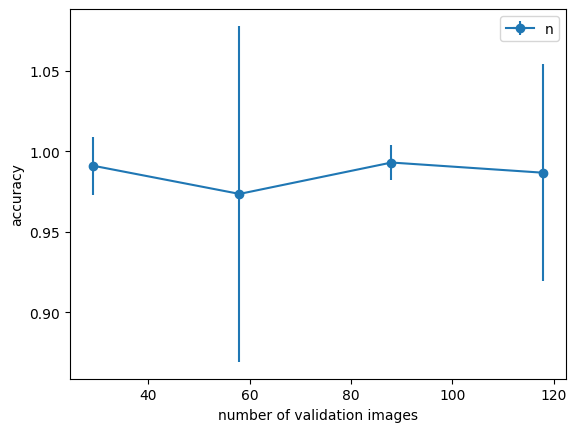

In [5]:
# plot accuracies obtained at different sizes
plt.figure()
plt.errorbar(nn_x, nn_y, nn_y_err, nn_x_err, marker='o')
plt.xlabel('number of validation images')
plt.ylabel('accuracy')
plt.legend('neural network')

# Method 2: SIFT and similarity graph

In [6]:
# Uncomment if you did not run method 1
# raw_data_x, raw_data_y, num_classes, data_dim, img_sz = sift_on_mnist.prepare_data('mnist')

In [7]:
# Test Area
# portion = 0.005
# fracs = [0.6, 0.4]
# show_msgs = True

# num_train, num_val, acc, M = sift_on_mnist.learn_graph(raw_data_x, raw_data_y, portion, fracs, img_sz, show_msgs)

In [ ]:
portions = [0.005, 0.01, 0.015, 0.02]
#portions = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03]
rpt = 5

sg_x = []
sg_y = []
sg_x_err = []
sg_y_err = []

for portion in portions:
    accs = []
    num_vals = []
    for i in range(rpt):
        _, num_val1, acc1, _ = sift_on_mnist.learn_graph(raw_data_x, raw_data_y, portion=portion, \
                                                         fracs=[0.6, 0.4], show_msgs=False)
        print('portion = {} #{}:\tnum_val = {}\tacc = {:.6f}'.format(portion, i, num_val1, acc1))
        accs.append(acc1)
        num_vals.append(num_val1)
        
    sg_x.append(np.mean(num_vals))
    sg_x_err.append(np.std(num_vals))
    sg_y.append(np.mean(accs))
    sg_y_err.append(np.std(accs))
    print('portion = {} #FINAL:\tnum_val = {:.6f} +- {:.6f}\tacc = {:.6f} +- {:.6f}'\
          .format(portion, np.mean(num_vals), np.std(num_vals), np.mean(accs), np.std(accs)))

In [ ]:
plt.figure()
plt.errorbar(sg_x, sg_y, sg_y_err, sg_x_err, marker='o')
plt.xlabel('number of validation images')
plt.ylabel('accuracy')
plt.legend('graph filter')

## Both methods on one plot

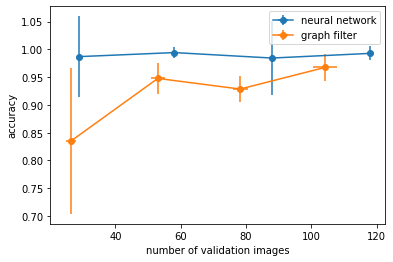

In [12]:
plt.figure()
plt.errorbar(nn_x, nn_y, nn_y_err, nn_x_err, marker='o')
plt.errorbar(sg_x, sg_y, sg_y_err, sg_x_err, marker='o')
plt.xlabel('number of validation images')
plt.ylabel('accuracy')
plt.legend(['neural network', 'graph filter'])
plt.show()

# Compare both methods in one function

In [13]:
def compare_nn_sg(portions, nn_runs=50, sg_runs=5, nn_show_msgs=True, sg_show_msgs=True):
    """
    Run neural network and similarity graph methods multiple times.
    Measure mean and std of obtained accuracies.
    Plot accuracies.
    
    Input: portions, nn_runs, sg_runs, show_msgs
    portions - determines size of problem to run
    nn_runs - number of times nn will run for each problem size
    sg_runs - number of times sg will run for each problem size
    nn_show_msgs - wether or not to show results for each run of nn
    sg_show_msgs - wether or not to show results for each run of sg
    
    Output: nn_stats, sg_stats
    nn_stats - dict of mean and std of accuracies and num_vals obtained by nn
    sg_stats - dict of mean and std of accuracies and num_vals obtained by sg
    """
    
    # run nn
    nn_x = []
    nn_y = []
    nn_x_err = []
    nn_y_err = []

    if nn_show_msgs:
        print('@@ Neural Network:')
        
    for portion in portions:
        accs = []
        num_vals = []
        for i in range(nn_runs):
            _, num_val1, acc1, _ = nn_on_mnist.learn_nn(raw_data_x, raw_data_y, \
                                                        portion=portion, fracs=[0.6, 0.4], \
                                                        num_classes=num_classes, show_msgs=False)
            if nn_show_msgs:
                print('portion = {} #{}:\tnum_val = {}\tacc = {:.6f}'.format(portion, i, num_val1, acc1))
            accs.append(acc1)
            num_vals.append(num_val1)

        nn_x.append(np.mean(num_vals))
        nn_x_err.append(np.std(num_vals))
        nn_y.append(np.mean(accs))
        nn_y_err.append(np.std(accs))
        if nn_show_msgs:
            print('portion = {} #FINAL:\tnum_val = {:.6f} +- {:.6f}\tacc = {:.6f} +- {:.6f}'\
                  .format(portion, np.mean(num_vals), np.std(num_vals), np.mean(accs), np.std(accs)))
    
    # run sg
    sg_x = []
    sg_y = []
    sg_x_err = []
    sg_y_err = []
    
    if sg_show_msgs:
        print('@@ Similarity Graph:')

    for portion in portions:
        accs = []
        num_vals = []
        for i in range(sg_runs):
            _, num_val1, acc1, _ = sift_on_mnist.learn_graph(raw_data_x, raw_data_y, portion=portion, \
                                                             fracs=[0.6, 0.4], show_msgs=False)
            if sg_show_msgs:
                print('portion = {} #{}:\tnum_val = {}\tacc = {:.6f}'.format(portion, i, num_val1, acc1))
            accs.append(acc1)
            num_vals.append(num_val1)

        sg_x.append(np.mean(num_vals))
        sg_x_err.append(np.std(num_vals))
        sg_y.append(np.mean(accs))
        sg_y_err.append(np.std(accs))
        if sg_show_msgs:
            print('portion = {} #FINAL:\tnum_val = {:.6f} +- {:.6f}\tacc = {:.6f} +- {:.6f}'\
                  .format(portion, np.mean(num_vals), np.std(num_vals), np.mean(accs), np.std(accs)))
        
    
    # plot accuracies
    plt.figure()
    plt.errorbar(nn_x, nn_y, nn_y_err, nn_x_err, marker='o')
    plt.errorbar(sg_x, sg_y, sg_y_err, sg_x_err, marker='o')
    plt.xlabel('number of validation images')
    plt.ylabel('accuracy')
    plt.legend(['neural network', 'graph filter'])
    plt.show()
    
    nn_stats = {'nn_nv': nn_x, 'nn_nv_err': nn_x_err, 'nn_ac': nn_y, 'nn_ac_err': nn_y_err}
    sg_stats = {'sg_nv': sg_x, 'sg_nv_err': sg_x_err, 'sg_ac': sg_y, 'sg_ac_err': sg_y_err}
    
    return nn_stats, sg_stats
    

@@ Neural Network:
portion = 0.005 #0:	num_val = 29	acc = 1.000000
portion = 0.005 #1:	num_val = 29	acc = 0.965517
portion = 0.005 #2:	num_val = 29	acc = 1.000000
portion = 0.005 #3:	num_val = 29	acc = 0.965517
portion = 0.005 #4:	num_val = 29	acc = 1.000000
portion = 0.005 #FINAL:	num_val = 29.000000 +- 0.000000	acc = 0.986207 +- 0.016893
portion = 0.01 #0:	num_val = 58	acc = 0.982759
portion = 0.01 #1:	num_val = 58	acc = 1.000000
portion = 0.01 #2:	num_val = 58	acc = 1.000000
portion = 0.01 #3:	num_val = 58	acc = 1.000000
portion = 0.01 #4:	num_val = 58	acc = 1.000000
portion = 0.01 #FINAL:	num_val = 58.000000 +- 0.000000	acc = 0.996552 +- 0.006897
portion = 0.015 #0:	num_val = 88	acc = 0.988636
portion = 0.015 #1:	num_val = 88	acc = 1.000000
portion = 0.015 #2:	num_val = 88	acc = 1.000000
portion = 0.015 #3:	num_val = 88	acc = 0.988636
portion = 0.015 #4:	num_val = 88	acc = 1.000000
portion = 0.015 #FINAL:	num_val = 88.000000 +- 0.000000	acc = 0.995455 +- 0.005567
portion = 0.02 #0:

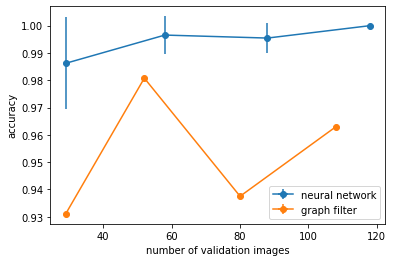

({'nn_nv': [29.0, 58.0, 88.0, 118.0],
  'nn_nv_err': [0.0, 0.0, 0.0, 0.0],
  'nn_ac': [0.9862068965517242, 0.9965517241379309, 0.9954545454545455, 1.0],
  'nn_ac_err': [0.016893032708849485,
   0.006896551724137945,
   0.005567022142689036,
   0.0]},
 {'sg_nv': [29.0, 52.0, 80.0, 108.0],
  'sg_nv_err': [0.0, 0.0, 0.0, 0.0],
  'sg_ac': [0.9310344827586207,
   0.9807692307692307,
   0.9375,
   0.9629629629629629],
  'sg_ac_err': [0.0, 0.0, 0.0, 0.0]})

In [14]:
portions = [0.005, 0.01, 0.015, 0.02]
nn_stats, sg_stats = compare_nn_sg(portions=portions, nn_runs=5, sg_runs=1, nn_show_msgs=False, sg_show_msgs=True)

# Old manual measurements

In [2]:
sizes = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03]
nn_nums = [(43, 29), (88, 58), (132, 88), (177, 118), (221, 147), (265, 177)]
gf_nums = [(41, 26), (81, 54), (120, 82), (161, 106), (199, 131), (239,154)]
NN = [1.000000, 1.000000, 1.000000, 0.991525, 0.993197, 0.988701]
GF = [0.961538, 0.962963, 0.939024, 0.962264, 0.923664, 0.922078]

Text(0, 0.5, 'accuracy')

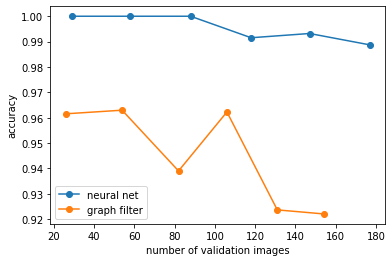

In [10]:
plt.figure()
plt.plot([y for (x,y) in nn_nums], NN, 'o-')
plt.plot([y for (x,y) in gf_nums], GF, 'o-')
plt.legend(['neural net', 'graph filter'])
plt.xlabel('number of validation images')
plt.ylabel('accuracy')